In [4]:
#!pip install numpy pandas matplotlib seaborn plotly scikit-learn joblib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course    

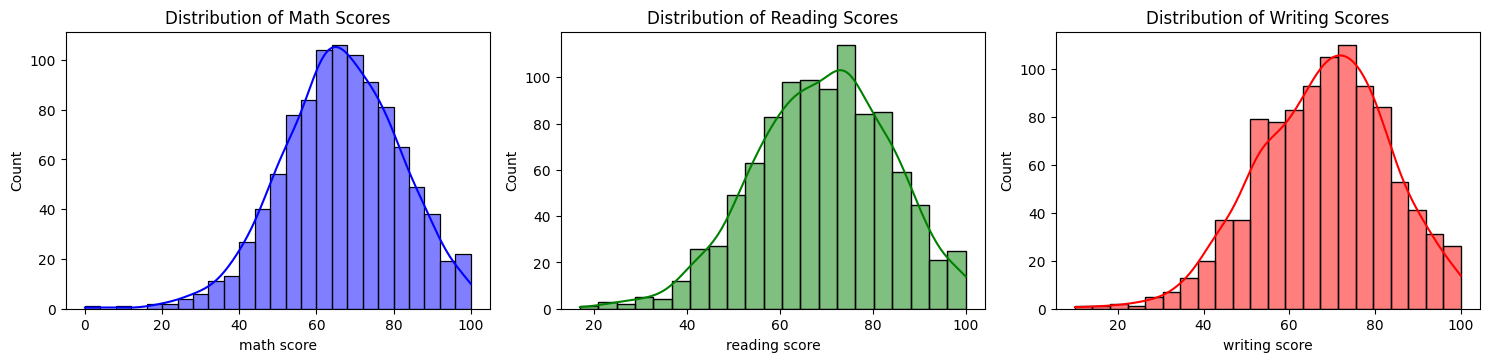

-------------------------------------------------------


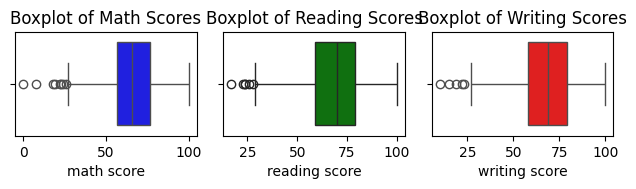

-------------------------------------------------------


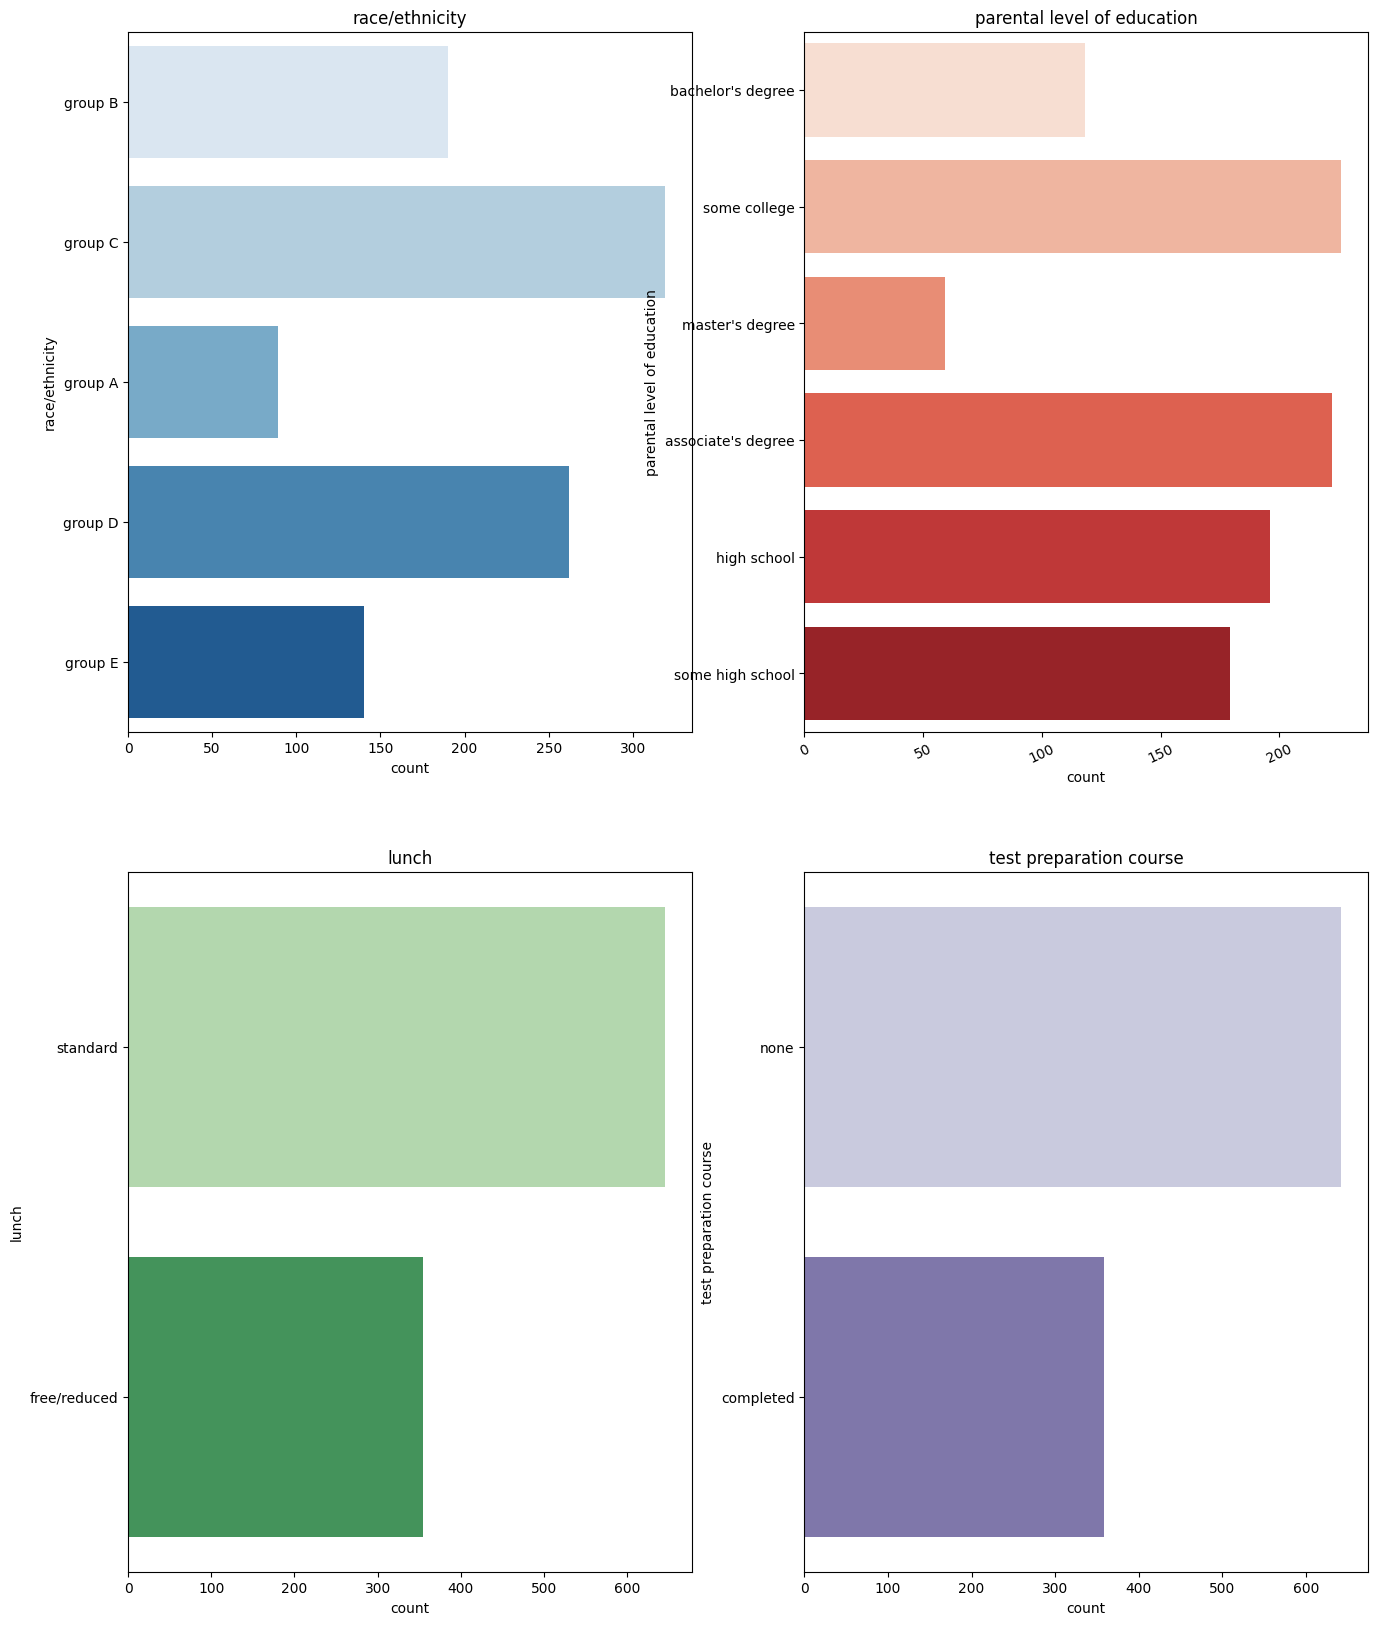

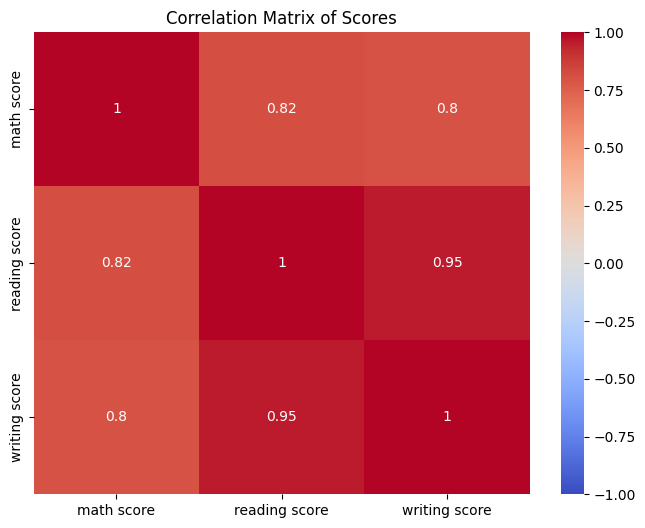

-------------------------PART 3: ML MODELS------------------------------
MODEL1: DECISION TREE
Test accuracy: 0.63/Max Depth: 1
Test accuracy: 0.725/Max Depth: 2
Test accuracy: 0.805/Max Depth: 3
Test accuracy: 0.845/Max Depth: 4
Test accuracy: 0.865/Max Depth: 5
Test accuracy: 0.85/Max Depth: 6
Test accuracy: 0.86/Max Depth: 7
Test accuracy: 0.845/Max Depth: 8
Test accuracy: 0.825/Max Depth: 9
Best Accuracy: 0.865/Max Depth: 5
-------------------------------------------------------
MODEL2: LOGISTIC REGRESSION
Test accuracy: 0.91/Test Size: 1
Test accuracy: 0.91/Test Size: 2
Test accuracy: 0.91/Test Size: 3
Test accuracy: 0.91/Test Size: 4
Test accuracy: 0.91/Test Size: 5
Test accuracy: 0.91/Test Size: 6
Test accuracy: 0.91/Test Size: 7
Test accuracy: 0.91/Test Size: 8
Test accuracy: 0.91/Test Size: 9
Best Accuracy(test): 0.91/Test Size: 1
-------------------------------------------------------
MODEL3: RANDOM FOREST
Test Score: 0.83/Number of Estimators: 20 
Test Score: 0.82/Number of 

,Models,Scores
2,Random Forest,0.850
1,Decision Tree,0.865
0,Logistic Regression,0.910


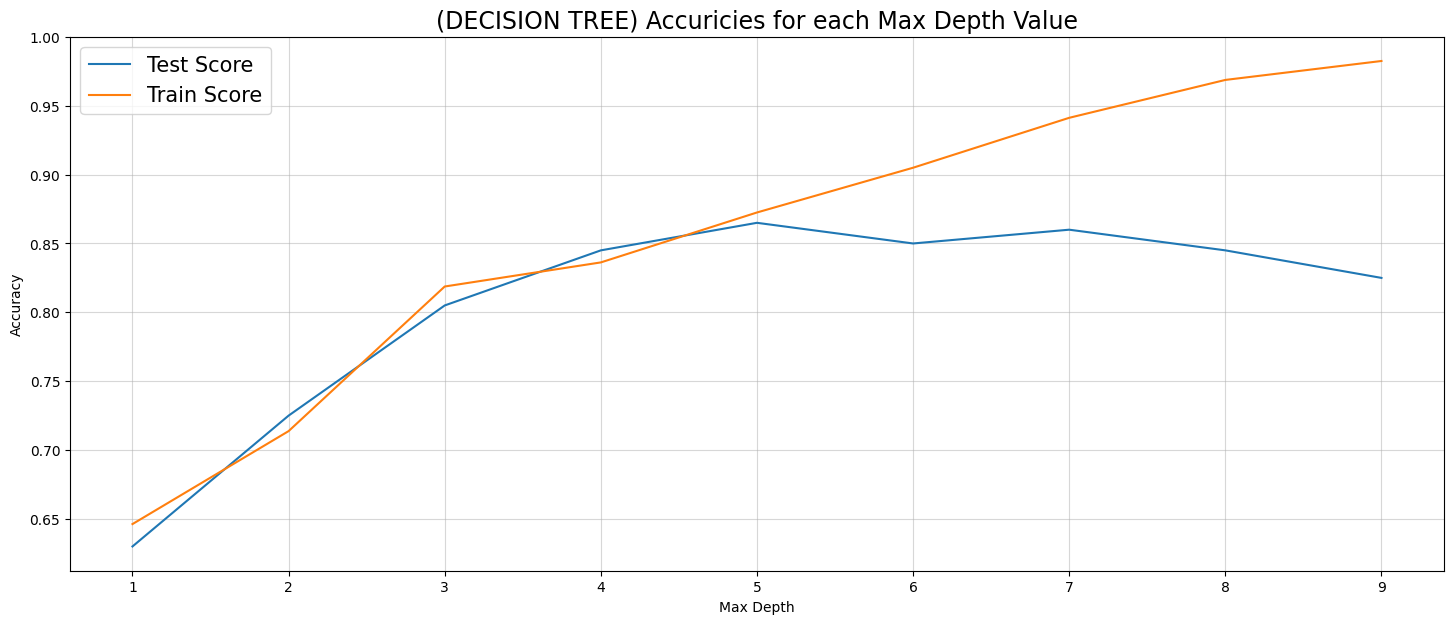

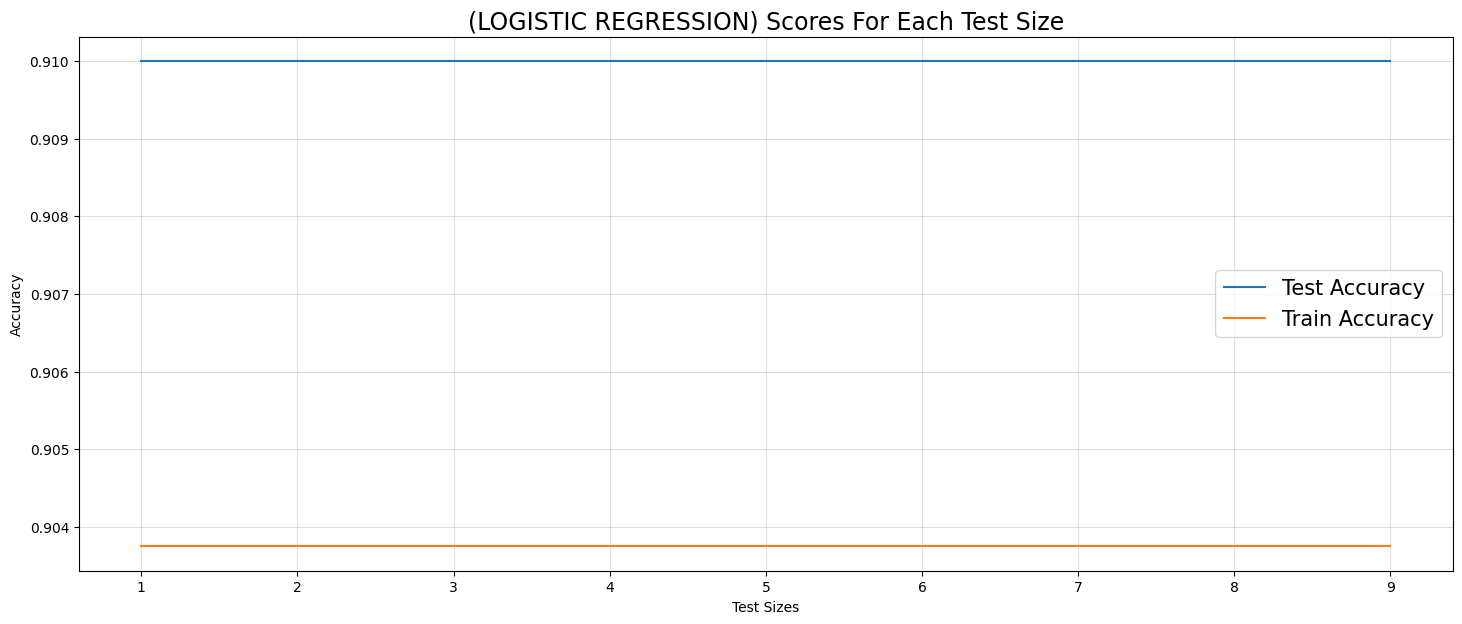

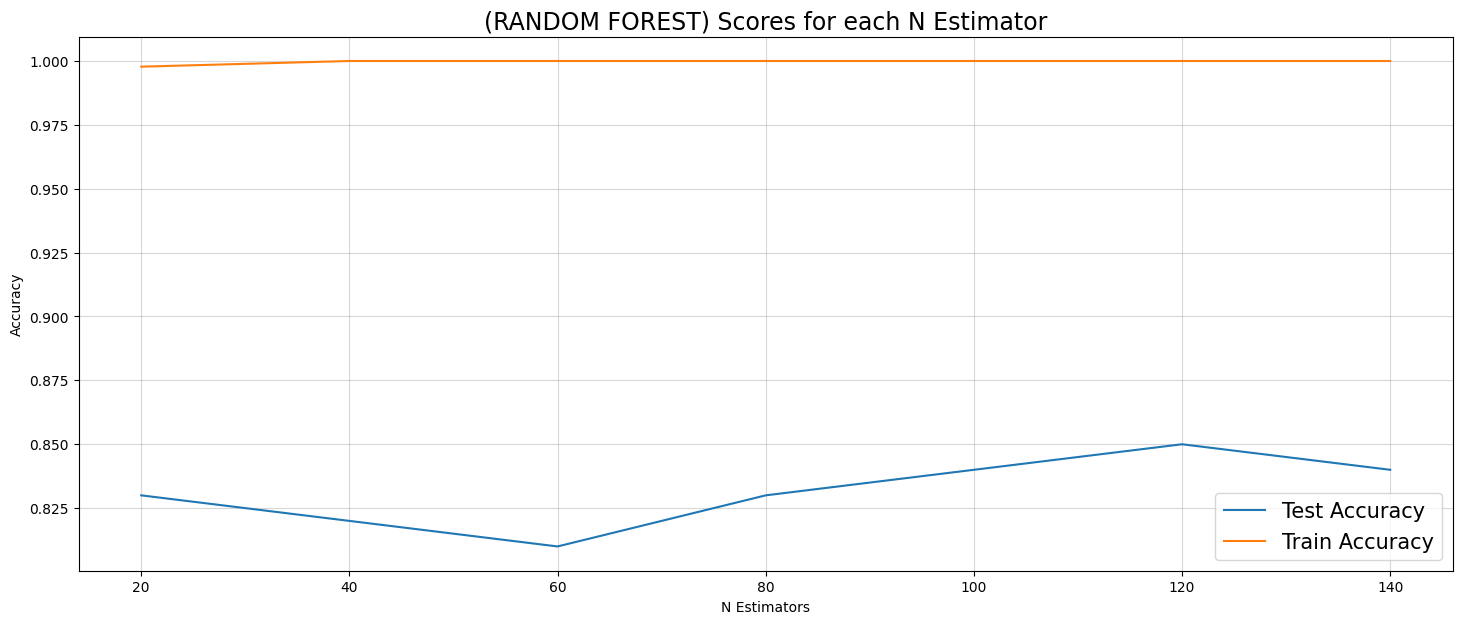

In [4]:
# install pip install keras and pip install tensorflow keras in Command Prompt

import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import  GridSpec
from pandas.plotting import scatter_matrix
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# PART0: Insert Dataset from Kaggle
data = pd.read_csv('StudentsPerformance.csv')
print(data.head())
print(data.isnull().sum()) # Information about the dataset
print("-------------------------------------------------------")
data_shape = data.shape # Number Rows and Collumns of Datasets (Row, Collumn)
print(f"Data shape: {data_shape}")
print("-------------------------------------------------------")
data.info() # Information about dataset
print("-------------------------------------------------------")
data_describe = data.describe().T # Data Frame with descriptive statistics for attributes
print(data_describe)
print("-------------------------PART 1: EDA------------------------------")


# PART1: Exploratory Data Analysis (EDA)
## 1.1. Histogram and Kernel Density Estimation (KDE)
plt.figure(figsize=(15, 10)) # Set up the matplotlib figure
plt.subplot(3, 3, 1) # Histogram and KDE plot for math scores
sns.histplot(data['math score'], kde=True, color='blue')
plt.title('Distribution of Math Scores')

plt.subplot(3, 3, 2) # Histogram and KDE plot for reading scores
sns.histplot(data['reading score'], kde=True, color='green')
plt.title('Distribution of Reading Scores')

plt.subplot(3, 3, 3) # Histogram and KDE plot for writing scores
sns.histplot(data['writing score'], kde=True, color='red')
plt.title('Distribution of Writing Scores')
plt.tight_layout()
plt.show()
print("-------------------------------------------------------")

## 1.2. Boxplot
plt.subplot(3, 3, 1) # Boxplot for math scores
sns.boxplot(x=data['math score'], color='blue')
plt.title('Boxplot of Math Scores')

plt.subplot(3, 3, 2) # Boxplot for reading scores
sns.boxplot(x=data['reading score'], color='green')
plt.title('Boxplot of Reading Scores')

plt.subplot(3, 3, 3) # Boxplot for writing scores
sns.boxplot(x=data['writing score'], color='red')
plt.title('Boxplot of Writing Scores')
plt.tight_layout()
plt.show()
print("-------------------------------------------------------")

## 1.3. Countplot of Race/Ethnicity, Parental level of education and Lunch
fig, ax = plt.subplots(2,2, figsize = (16,20))

sns.countplot(data["race/ethnicity"],palette = "Blues", ax = ax[0,0])
ax[0,0].set_title("race/ethnicity")

sns.countplot(data["parental level of education"],palette = "Reds", ax = ax[0,1])
ax[0,1].set_title("parental level of education")
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation = 25)

sns.countplot(data["lunch"],palette = "Greens", ax = ax[1,0])
ax[1,0].set_title("lunch")

sns.countplot(data["test preparation course"],palette = "Purples", ax = ax[1,1])
ax[1,1].set_title("test preparation course")
plt.show()

## 1.4. Heatmap
corr_matrix = data[['math score', 'reading score', 'writing score']].corr() # Compute the correlation matrix
plt.figure(figsize=(8, 6)) # Set up the matplotlib figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1) # Draw the heatmap with the mask and correct aspect ratio
plt.title('Correlation Matrix of Scores')
plt.show()
print("-------------------------PART 3: ML MODELS------------------------------")



# PART2: Data Preprocessing
data["gender"] = [1 if each == "female" else 0 for each in data["gender"]] # female = 1, male = 0
gender_data = data["gender"]
data_without_gender = data.drop(["gender"], axis = 1)
data_without_gender.head()

data_without_gender = pd.get_dummies(data_without_gender) #One-hot Encoding
data_without_gender.head()

X_train, X_test, y_train, y_test = train_test_split(data_without_gender, gender_data,test_size = 0.2, random_state = 42)



# PART3: Machine Learning Models
## 3.1. Decision Tree
print("MODEL1: DECISION TREE")
score_list_dt = [] #Initialization
train_list = []

for d in range(1,10):
    clf = DecisionTreeClassifier(max_depth = d,random_state = 42)
    clf = clf.fit(X_train, y_train)
    print("Test accuracy: {}/Max Depth: {}".format(clf.score(X_test,y_test),d))
    score_list_dt.append(clf.score(X_test,y_test))
    train_list.append(clf.score(X_train,y_train))

#Train the Best Model
dt_best = DecisionTreeClassifier(max_depth = 1+score_list_dt.index(np.max(score_list_dt)))
dt_best = dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)
y_true = y_test
print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_dt),1+score_list_dt.index(np.max(score_list_dt))))

fig, ax = plt.subplots(1,2, figsize = (17,6)) #Plot the Accuracies
gs = fig.add_gridspec(1, 4)
grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax1.plot(range(1,10),score_list_dt,label = "Test Score")
ax1.plot(range(1,10),train_list,label = "Train Score")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Max Depth")
ax1.set_ylabel("Accuracy")
ax1.grid(True, alpha = 0.5)
ax1.set_title("(DECISION TREE) Accuricies for each Max Depth Value",fontsize = 17)
print("-------------------------------------------------------")

## 3.2. Logistic Rogression
print("MODEL2: LOGISTIC REGRESSION")
score_list_lr = [] #Initialization
train_list = []

for i in range(1,10):
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    print("Test accuracy: {}/Test Size: {}".format(lr.score(X_test,y_test),i))
    score_list_lr.append(lr.score(X_test,y_test))
    train_list.append(lr.score(X_train,y_train))

#Train the Best Model
X_train, X_test, y_train, y_test = train_test_split(data_without_gender,gender_data,test_size = (1+score_list_lr.index(np.max(score_list_lr)))/10, random_state = 42)

lr_best = LogisticRegression(random_state = 42)
lr_best = lr_best.fit(X_train, y_train)
filename = 'finalized_model.sav'
joblib.dump(lr_best, filename)
y_pred = lr_best.predict(X_test)
y_true = y_test
print("Best Accuracy(test): {}/Test Size: {}".format(np.max(score_list_lr),1+score_list_lr.index(np.max(score_list_lr))))

fig, ax = plt.subplots(1,2, figsize = (17,6)) #Plot the Accuracies
gs = fig.add_gridspec(1, 4)
grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax1.plot(range(1,10),score_list_lr,label = "Test Accuracy")
ax1.plot(range(1,10),train_list, label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("Test Sizes")
ax1.set_ylabel("Accuracy")
ax1.set_title("(LOGISTIC REGRESSION) Scores For Each Test Size",fontsize = 17)
ax1.grid(True, alpha = 0.4)
print("-------------------------------------------------------")

## 3.3. RandomForest
print("MODEL3: RANDOM FOREST")
score_list_rf = [] #Initialization
train_list = []

for i in range(20,160,20):
    rf = RandomForestClassifier(n_estimators = i, random_state = 42) #100
    rf.fit(X_train,y_train)
    print("Test Score: {}/Number of Estimators: {} ".format(rf.score(X_test,y_test),i))
    score_list_rf.append(rf.score(X_test,y_test))
    train_list.append(rf.score(X_train,y_train))

#Train the best model
rf_best = RandomForestClassifier(n_estimators = 20*(1+score_list_rf.index(np.max(score_list_rf))))
rf_best = rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)
y_true = y_test
print("Best Accuracy: {}/Max Depth: {}".format(np.max(score_list_rf),20*(1+score_list_rf.index(np.max(score_list_rf)))))

fig, ax = plt.subplots(1,2, figsize = (17,6))
gs = fig.add_gridspec(1, 4)
grid = GridSpec(1,4,left=0.1, bottom=0.05, right=1.2, top=0.94, wspace=0.3, hspace=0.3)

ax1 = fig.add_subplot(grid[0:3])
ax1.plot(range(20,160,20),score_list_rf,label = "Test Accuracy")
ax1.plot(range(20,160,20),train_list,label = "Train Accuracy")
ax1.legend(fontsize = 15)
ax1.set_xlabel("N Estimators")
ax1.set_ylabel("Accuracy")
ax1.set_title("(RANDOM FOREST) Scores for each N Estimator",fontsize = 17)
ax1.grid(True, alpha=0.5)
print("-------------------------PART 4: STACKING------------------------------")



# PART 4: Ensemble with Stacking
# Stacking
estimators = [
    ('dt', DecisionTreeClassifier(max_depth=np.argmax(score_list_dt) + 1, random_state=42)),
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=(np.argmax(score_list_rf) + 1) * 20, random_state=42))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier accuracy:", stacking_clf.score(X_test, y_test))
print("-------------------------PART 5: DEEP LEARNING MODEL------------------------------")



# PART 5: Deep Learning Model (Keras)
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')])
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print("Test accuracy for Deep Learning Model:", test_accuracy)
print("-------------------------PART 6: EVALUATE THE MODEL------------------------------")



# PART 6: Evaluate the model
dict_models = {"Models":["Logistic Regression",
                       "Decision Tree",
                       "Random Forest",],
             "Scores":[np.max(score_list_lr).round(3),
                       np.max(score_list_dt).round(3),
                       np.max(score_list_rf).round(3),]}

data_scores_models = pd.DataFrame(data=dict_models)
data_scores_models = data_scores_models.sort_values(by = ["Scores"])
data_scores_models.head(len(data_scores_models))

In [6]:
#!pip install Flask


  Using cached werkzeug-3.0.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached MarkupSafe-2.1.5-cp311-cp311-win_amd64.whl.metadata (3.1 kB)
   ---------------------------------------- 0.0/101.7 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/101.7 kB ? eta -:--:--
   ----------- --------------------------- 30.7/101.7 kB 640.0 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/101.7 kB 640.0 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/101.7 kB 640.0 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 163.4 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 163.4 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 163.4 kB/s eta 0:00:01
   --------------- ----------------------- 41.0/101.7 kB 163.4 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/101.7 kB 136.5 kB/s eta 0:00:01
   ----------------------- --------------- 61.4/101.7 kB 136.5 kB/s eta 0:00